Importing required libraries.

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

**1. Load the dataset and print how many data instances (samples) we have.**

In [49]:
dataset = pd.read_csv("drive/MyDrive/SEIS764/Assignments/Assignment2/concrete.csv")
print("Total samples: " + str(dataset.shape[0]))


Total samples: 1030


**2. Check if there are any missing values in any of the columns.**

In [50]:
dataset.isna().sum(axis=0)
# No missing values for any columns

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

**3. Split the data into the features (i.e. X) and the target (i.e. y). Print first few rows of X and y.**

In [51]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,8]

X.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [52]:
y.head(5)

0    79.99
1    61.89
2    40.27
3    41.05
4    44.30
Name: Strength, dtype: float64

**4. Split the dataset into training (70%) and testing (validation) set (30%). Perform normalization of the data using standardization.**

In [53]:
# 70-30 train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Normalization using standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**5. Build a simple NN Regression model that has one Dense unit. Specify mean_squared_error for the loss and adam for optimizer. Run it for 100 epochs. Plot the loss plot for training and validation. You can do that like this: r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)**

In [54]:
# Model instantiation
model = tf.keras.Sequential(
    keras.layers.Dense(units = 1, input_shape=[8])
)

# Model compilation
model.compile(
   optimizer = 'adam', loss = 'mean_squared_error'
)

# Model fitting
r_adam = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100
)

Epoch 1/100
23/23 [==============================] - 1s 10ms/step - loss: 1540.5409 - val_loss: 1503.9054
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 1538.1464 - val_loss: 1501.7511
Epoch 3/100
23/23 [==============================] - 0s 5ms/step - loss: 1535.7897 - val_loss: 1499.5616
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 1533.4369 - val_loss: 1497.3889
Epoch 5/100
23/23 [==============================] - 0s 7ms/step - loss: 1531.0413 - val_loss: 1495.2821
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 1528.6893 - val_loss: 1493.0369
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 1526.3029 - val_loss: 1490.8237
Epoch 8/100
23/23 [==============================] - 0s 5ms/step - loss: 1523.9374 - val_loss: 1488.6871
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 1521.6023 - val_loss: 1486.5179
Epoch 10/100
23/23 [==============================] - 

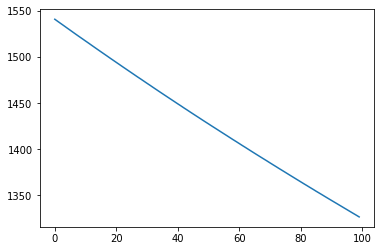

In [55]:
# Loss plot for training and validation
plt.plot(r_adam.history['loss'])

**6. Next, change the optimizer to sgd. Run it for 100 epochs. Plot the loss plot for training and validation.**

In [56]:
# Model compilation
model.compile(
   optimizer = 'sgd', loss = 'mean_squared_error'
)

# Model fitting
r_sgd = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100
)

Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 930.8478 - val_loss: 584.0109
Epoch 2/100
23/23 [==============================] - 0s 5ms/step - loss: 443.0243 - val_loss: 297.1515
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 249.3317 - val_loss: 181.3876
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 173.1020 - val_loss: 135.4973
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 143.2210 - val_loss: 115.7142
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 130.3661 - val_loss: 106.6576
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 124.7849 - val_loss: 102.1199
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 122.1745 - val_loss: 99.9458
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 120.9709 - val_loss: 98.5840
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 

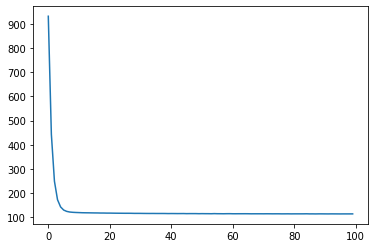

In [57]:
# Loss plot for training and validation
plt.plot(r_sgd.history['loss'])

**7. Now, change the optimizer to rmsprop. Run it for 100 epochs. Plot the loss plot for training and validation.**

In [58]:
# Model compilation
model.compile(
   optimizer = 'rmsprop', loss = 'mean_squared_error'
)

# Model fitting
r_rmsprop = model.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100
)

Epoch 1/100
23/23 [==============================] - 1s 11ms/step - loss: 113.7433 - val_loss: 93.4341
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 113.7323 - val_loss: 93.4294
Epoch 3/100
23/23 [==============================] - 0s 7ms/step - loss: 113.7369 - val_loss: 93.4286
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 113.7348 - val_loss: 93.4266
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 113.7343 - val_loss: 93.4301
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 113.7282 - val_loss: 93.4295
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 113.7328 - val_loss: 93.4241
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 113.7324 - val_loss: 93.4231
Epoch 9/100
23/23 [==============================] - 0s 6ms/step - loss: 113.7324 - val_loss: 93.4187
Epoch 10/100
23/23 [==============================] - 0s 6ms/step - loss: 113.730

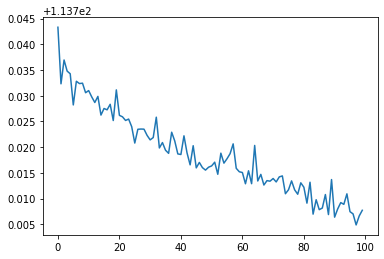

In [59]:
# Loss plot for training and validation
plt.plot(r_rmsprop.history['loss'])

**8. Which network performed the best? Do you have ideas on how the performance can be improved?**

Though network with both sgd and rmsprop optimizers achieve a minimum loss function value at 93 (approximately), but with rmsprop we are able to achieve the lowest value of 93 in first epoch run itself. So, rmsprop performs the best. The sgd performance can be improved by adding momentum of 0.9 and learning rate of (0.01,0.001).

In [60]:
#Experimenting with momentum and learning rate for sgd optimizer
# Model instantiation
model1 = tf.keras.Sequential(
    keras.layers.Dense(units = 1, input_shape=[8])
)

#learning_rate = 0.01 momentum=0.9
model1.compile(optimizer=tf.keras.optimizers.SGD(0.01,0.9),loss='mean_squared_error')

# Model fitting
r_sgd_1 = model1.fit(
    X_train, y_train, validation_data = (X_test, y_test), epochs = 100
)


Epoch 1/100
23/23 [==============================] - 1s 12ms/step - loss: 549.5110 - val_loss: 190.2725
Epoch 2/100
23/23 [==============================] - 0s 6ms/step - loss: 160.1668 - val_loss: 110.3554
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 125.6381 - val_loss: 96.6795
Epoch 4/100
23/23 [==============================] - 0s 5ms/step - loss: 122.1409 - val_loss: 102.3377
Epoch 5/100
23/23 [==============================] - 0s 5ms/step - loss: 119.9285 - val_loss: 94.9966
Epoch 6/100
23/23 [==============================] - 0s 7ms/step - loss: 117.7906 - val_loss: 92.4151
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 118.4956 - val_loss: 93.6234
Epoch 8/100
23/23 [==============================] - 0s 6ms/step - loss: 118.0167 - val_loss: 92.9655
Epoch 9/100
23/23 [==============================] - 0s 5ms/step - loss: 122.2493 - val_loss: 104.9187
Epoch 10/100
23/23 [==============================] - 0s 5ms/step - loss: 119

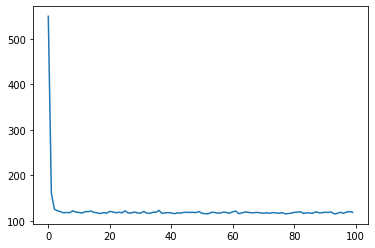

In [62]:
# Loss plot for training and validation
plt.plot(r_sgd_1.history['loss'])